In [20]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests
from utils import *

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-small')

In [ ]:
# How to save a model

#model = YolosForObjectDetection.save_pretrained('test_model')
#model2 = YolosForObjectDetection.from_pretrained('testmodel')

In [21]:
from transformers import pipeline

In [22]:
object_detector = pipeline('object-detection', model=model ,feature_extractor=feature_extractor)

/Users/kohmann/Documents/Studie/2022 Høst/Visual_intelligence/roadcrack-detection/venv/lib/python3.9/site-packages/transformers/models/yolos/feature_extraction_yolos.py:676: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


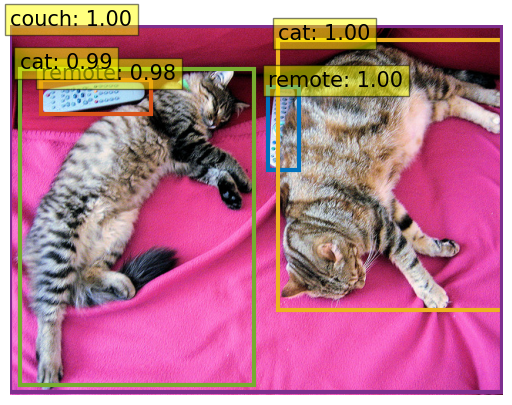

In [23]:
results = object_detector(image)
plot_results(image, results)

In [ ]:
dataset = "Norway"
train = True
dataset_path = "..datasets"
